In [ ]:
#Importing required libraries
import os
import glob
import shutil
import random
import pandas as pd
import numpy as np
from skimage.transform import resize
import matplotlib.pyplot as plt
from matplotlib.pyplot import imshow

from sklearn.model_selection import train_test_split

import tensorflow as tf
from tensorflow import keras 

from keras.models import Model, load_model
from keras.layers import Input, BatchNormalization, Activation, Dense, Dropout
from keras.layers.core import Reshape
from keras.layers.convolutional import Conv2D, Conv2DTranspose
from keras.layers.pooling import MaxPooling2D, GlobalMaxPool2D
from keras.layers import concatenate, add
from tensorflow.keras.optimizers import Adam
from keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.utils import img_to_array,array_to_img,load_img
%matplotlib inline

In [ ]:
#mounting the drive
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
#path of images and masks
image_path = "/content/drive/MyDrive/Unet_data//images/"
mask_path = "/content/drive/MyDrive/Unet_data/masks/"


In [ ]:
#setting the height ,width and channels of image
img_height = 128
img_width = 128
img_channels = 1


In [ ]:
#total number and list if images
image_ids = next(os.walk(image_path))[2]
print("No. of images = ", len(image_ids))
print(image_ids)

No. of images =  500
['10.png', '102.png', '100.png', '101.png', '1.png', '0.png', '118.png', '112.png', '104.png', '119.png', '121.png', '116.png', '107.png', '113.png', '120.png', '117.png', '108.png', '110.png', '109.png', '11.png', '115.png', '103.png', '114.png', '12.png', '105.png', '111.png', '106.png', '13.png', '129.png', '130.png', '122.png', '132.png', '131.png', '123.png', '125.png', '133.png', '126.png', '127.png', '124.png', '128.png', '134.png', '135.png', '14.png', '144.png', '142.png', '140.png', '138.png', '149.png', '146.png', '147.png', '150.png', '141.png', '143.png', '145.png', '148.png', '136.png', '137.png', '15.png', '139.png', '160.png', '153.png', '151.png', '162.png', '16.png', '164.png', '165.png', '157.png', '163.png', '158.png', '156.png', '154.png', '161.png', '155.png', '159.png', '152.png', '173.png', '181.png', '172.png', '167.png', '180.png', '175.png', '17.png', '174.png', '182.png', '178.png', '177.png', '166.png', '168.png', '170.png', '176.png', 

In [ ]:
#making new array of new shape filled with zeroes
X = np.zeros((len(image_ids), img_height, img_width, 1), dtype=np.float32)
y = np.zeros((len(image_ids), img_height, img_width, 1), dtype=np.float32)
len(X)

500

In [ ]:
#importing tqdm
import tqdm
from tqdm import tqdm_notebook, tnrange

In [ ]:
#resizing images and masks
for n,i in tqdm_notebook(enumerate(image_ids), total=len(image_ids)):
    # Load images
      img = load_img(image_path +str(i), color_mode="grayscale")
      x_img = img_to_array(img)
      x_img = resize(x_img, (128, 128, 1), mode = 'constant', preserve_range = True)
      # Load masks
      mask_i = str(i).split(".")[0] + "_mask.png"
      mask = img_to_array(load_img(mask_path + mask_i, color_mode="grayscale"))
      mask = resize(mask, (128, 128, 1), mode = 'constant', preserve_range = True)
      # Save images
      X[n] = x_img/255.0
      y[n] = mask/255.0
      # X[n] = x_img
      # y[n] = mask

<ipython-input-8-90f96402da42>:2: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  for n,i in tqdm_notebook(enumerate(image_ids), total=len(image_ids)):


  0%|          | 0/500 [00:00<?, ?it/s]

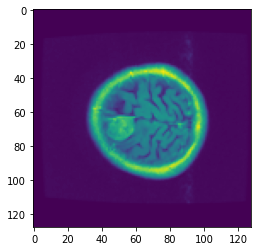

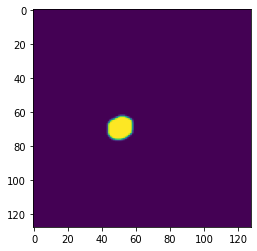

In [ ]:
#showing image and mask (randomly)
image_x = random.randint(0,len(X))
plt.imshow(np.squeeze(X[image_x]))
plt.show()
plt.imshow(np.squeeze(y[image_x]))
plt.show()

In [ ]:
#splitting data into test and train 
X_train, X_valid, y_train, y_valid = train_test_split(X, y, test_size=0.2, random_state=15)

In [ ]:
# model
##total 11 layers starting from (8,(3,3)) to (256,(3,3)) 


input = Input((img_height,img_width,img_channels))

# Contracting path
##conv_layer1 -> conv_layer2 -> max_pooling -> dropout

c0 = Conv2D(8,(3,3),activation="relu",kernel_initializer="he_normal",padding = "same")(input)
c0 = Conv2D(8,(3,3),activation="relu",kernel_initializer="he_normal",padding = "same")(c0)
p0 = MaxPooling2D((2,2))(c0)
p0 = Dropout(0.05)(p0)

c1 = Conv2D(16,(3,3),activation="relu",kernel_initializer="he_normal",padding = "same")(p0)
c1 = Conv2D(16,(3,3),activation="relu",kernel_initializer="he_normal",padding = "same")(c1)
p1 = MaxPooling2D((2,2))(c1)
p1 = Dropout(0.05)(p1)

c2 = Conv2D(32, (3, 3), activation='relu', kernel_initializer='he_normal', padding='same')(p1)
c2 = Conv2D(32, (3, 3), activation='relu', kernel_initializer='he_normal', padding='same')(c2)
p2 = MaxPooling2D((2, 2))(c2)
p2 = Dropout(0.1)(p2)

c3 = Conv2D(64, (3, 3), activation='relu', kernel_initializer='he_normal', padding='same')(p2)
c3 = Conv2D(64, (3, 3), activation='relu', kernel_initializer='he_normal', padding='same')(c3)
p3 = MaxPooling2D((2, 2))(c3)
p3 = Dropout(0.1)(p3)
 
c4 = Conv2D(128, (3, 3), activation='relu', kernel_initializer='he_normal', padding='same')(p3)
c4 = Conv2D(128, (3, 3), activation='relu', kernel_initializer='he_normal', padding='same')(c4)
p4 = MaxPooling2D(pool_size=(2, 2))(c4)
p4 = Dropout(0.2)(p4)
 
c5 = Conv2D(256, (3, 3), activation='relu', kernel_initializer='he_normal', padding='same')(p4)
c5 = Conv2D(256, (3, 3), activation='relu', kernel_initializer='he_normal', padding='same')(c5)

(8,8,256)

#Expansive path
##conv_2d_transpose -> concatenate -> conv_layer1 -> dropout -> conv_layer2 

u6 = Conv2DTranspose(128, (2, 2), strides=(2, 2), padding='same')(c5)
u6 = concatenate([u6, c4])
c6 = Conv2D(128, (3, 3), activation='relu', kernel_initializer='he_normal', padding='same')(u6)
c6 = Dropout(0.2)(c6)
c6 = Conv2D(128, (3, 3), activation='relu', kernel_initializer='he_normal', padding='same')(c6)
 
u7 = Conv2DTranspose(64, (2, 2), strides=(2, 2), padding='same')(c6)
u7 = concatenate([u7, c3])
c7 = Conv2D(64, (3, 3), activation='relu', kernel_initializer='he_normal', padding='same')(u7)
c7 = Dropout(0.2)(c7)
c7 = Conv2D(64, (3, 3), activation='relu', kernel_initializer='he_normal', padding='same')(c7)
 
u8 = Conv2DTranspose(32, (2, 2), strides=(2, 2), padding='same')(c7)
u8 = concatenate([u8, c2])
c8 = Conv2D(32, (3, 3), activation='relu', kernel_initializer='he_normal', padding='same')(u8)
c8 = Dropout(0.15)(c8)
c8 = Conv2D(32, (3, 3), activation='relu', kernel_initializer='he_normal', padding='same')(c8)
 
u9 = Conv2DTranspose(16, (2, 2), strides=(2, 2), padding='same')(c8)
u9 = concatenate([u9, c1])
c9 = Conv2D(16, (3, 3), activation='relu', kernel_initializer='he_normal', padding='same')(u9)
c9 = Dropout(0.1)(c9)
c9 = Conv2D(16, (3, 3), activation='relu', kernel_initializer='he_normal', padding='same')(c9)

u10 = Conv2DTranspose(8, (2, 2), strides=(2, 2), padding='same')(c9)
u10 = concatenate([u10, c0], axis=3)
c10 = Conv2D(8, (3, 3), activation='relu', kernel_initializer='he_normal', padding='same')(u10)
c10 = Dropout(0.1)(c10)
c10 = Conv2D(8, (3, 3), activation='relu', kernel_initializer='he_normal', padding='same')(c10)
 
#output layer
outputs = Conv2D(1, (1, 1), activation='sigmoid')(c10)
 
model = tf.keras.Model(inputs=[input], outputs=[outputs])
#optimizer and loss function
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
model.summary()  

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 128, 128, 1  0           []                               
                                )]                                                                
                                                                                                  
 conv2d (Conv2D)                (None, 128, 128, 8)  80          ['input_1[0][0]']                
                                                                                                  
 conv2d_1 (Conv2D)              (None, 128, 128, 8)  584         ['conv2d[0][0]']                 
                                                                                                  
 max_pooling2d (MaxPooling2D)   (None, 64, 64, 8)    0           ['conv2d_1[0][0]']           

In [ ]:
#fitting the model
results = model.fit(X_train, y_train, batch_size=32, epochs=40,
                    validation_data=(X_valid, y_valid))

Epoch 1/40
13/13 [==============================] - 27s 2s/step - loss: 0.5051 - accuracy: 0.9017 - val_loss: 0.2501 - val_accuracy: 0.9730
Epoch 2/40
13/13 [==============================] - 23s 2s/step - loss: 0.1714 - accuracy: 0.9705 - val_loss: 0.0900 - val_accuracy: 0.9734
Epoch 3/40
13/13 [==============================] - 23s 2s/step - loss: 0.0816 - accuracy: 0.9725 - val_loss: 0.0749 - val_accuracy: 0.9749
Epoch 4/40
13/13 [==============================] - 23s 2s/step - loss: 0.0705 - accuracy: 0.9741 - val_loss: 0.0701 - val_accuracy: 0.9750
Epoch 5/40
13/13 [==============================] - 23s 2s/step - loss: 0.0648 - accuracy: 0.9743 - val_loss: 0.0625 - val_accuracy: 0.9750
Epoch 6/40
13/13 [==============================] - 23s 2s/step - loss: 0.0578 - accuracy: 0.9743 - val_loss: 0.0646 - val_accuracy: 0.9750
Epoch 7/40
13/13 [==============================] - 23s 2s/step - loss: 0.0520 - accuracy: 0.9743 - val_loss: 0.0587 - val_accuracy: 0.9750
Epoch 8/40
13/13 [==

In [ ]:
#printing result
print(results)


In [ ]:
#prediction
preds_train = model.predict(X_train, verbose=1)
preds_val = model.predict(X_valid, verbose=1)


4/4 [==============================] - 1s 301ms/step


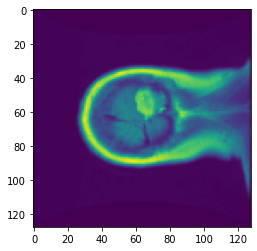

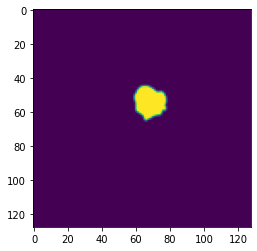

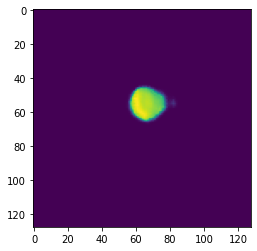

In [ ]:
#plotting image , mask and prediction(random image)
ix = random.randint(0, len(preds_train))
imshow(np.squeeze(X_train[ix]))
plt.show()
imshow(np.squeeze(y_train[ix]))
plt.show()
imshow(np.squeeze(preds_train[ix]))
plt.show()

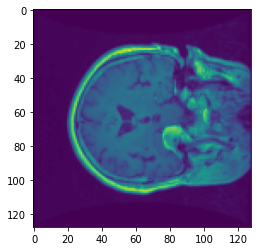

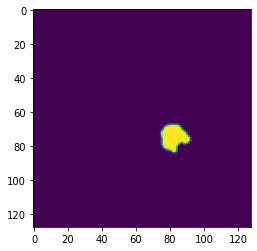

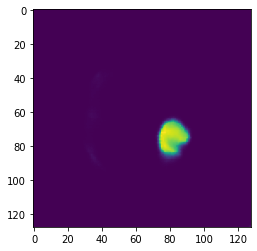

In [ ]:
ix = random.randint(0, len(preds_train))
imshow(np.squeeze(X_train[ix]))
plt.show()
imshow(np.squeeze(y_train[ix]))
plt.show()
imshow(np.squeeze(preds_train[ix]))
plt.show()